### Codio Activity 16.1: Polynomial Features and Classification


This activity focuses on comparing versions of logistic regression classifier on a wine dataset from scikitlearn.  Your goal is to understand how the performance changes and the decision boundary is effected.  


#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn import set_config
set_config(display="diagram")
import seaborn as sns

In [2]:
X, y = load_wine(return_X_y=True, as_frame=True)

In [3]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
X1 = X[['total_phenols', 'color_intensity']]

<Axes: xlabel='total_phenols', ylabel='color_intensity'>

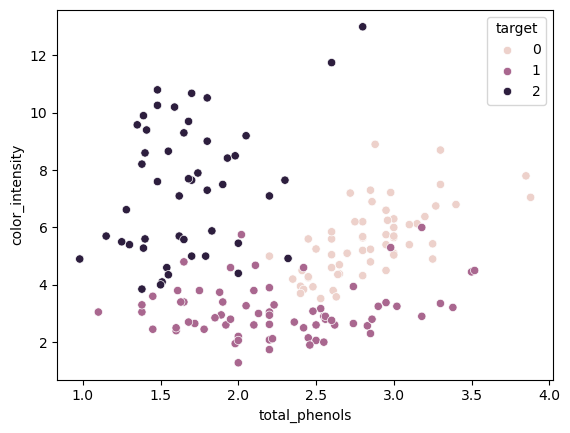

In [5]:
sns.scatterplot(data = X1, x = 'total_phenols', y = 'color_intensity', hue = y)

### Problem 1

#### Logistic Regression

Below, fit a `LogisticRegression` estimator with `multi_class = 'multinomial'` on `X1` and `y`.  Uncomment the code to visualize the decision boundary of the resulting estimator assigned to `lgr` below.

In [6]:
lgr = LogisticRegression(multi_class = 'multinomial').fit(X1,y)
lgr

/opt/miniconda3/envs/Linlin/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

/opt/miniconda3/envs/Linlin/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: xlabel='total_phenols', ylabel='color_intensity'>

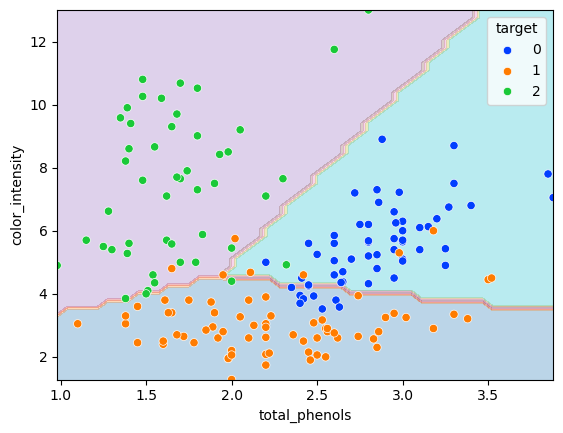

In [7]:
xx = np.linspace(X1.iloc[:, 0].min(), X1.iloc[:, 0].max(), 50)
yy = np.linspace(X1.iloc[:, 1].min(), X1.iloc[:, 1].max(), 50)
XX, YY = np.meshgrid(xx, yy)
grid = np.c_[XX.ravel(), YY.ravel()]
labels = pd.factorize(lgr.predict(grid))[0]

plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
sns.scatterplot(data = X1, x = 'total_phenols', y = 'color_intensity', hue = y,  palette = 'bright')

### Problem 2

#### Logistic Regression with Quadratic Features

Below, create and fit a `Pipeline` named `quad_pipe` with steps: 

- `poly`: Create quadratic features with `PolynomialFeatures` with no bias and degree of 2
- `scale`: `StandardScaler` applied to polynomial features
- `lgr`: `LogisticRegression` with `multi_class = 'multinomial'`

Visualize the decision boundary by uncommenting the code below.

In [9]:
quad_pipe = Pipeline([('poly', PolynomialFeatures(degree = 2)),
                      ('scale',StandardScaler()),
                      ('lgr',LogisticRegression(multi_class = 'multinomial'))]).fit(X1,y)
quad_pipe

/opt/miniconda3/envs/Linlin/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('poly', PolynomialFeatures()), ('scale', StandardScaler()),
                ('lgr', LogisticRegression(multi_class='multinomial'))])

/opt/miniconda3/envs/Linlin/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


<Axes: xlabel='total_phenols', ylabel='color_intensity'>

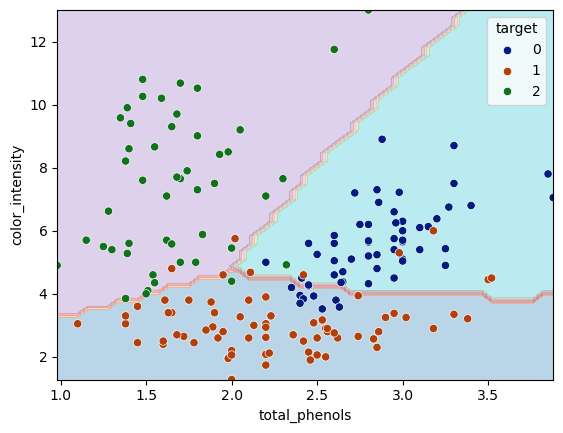

In [10]:
labels = pd.factorize(quad_pipe.predict(grid))[0]
plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
sns.scatterplot(data = X1, x = 'total_phenols', y = 'color_intensity', hue = y, palette = 'dark')

### Problem 3

#### Logistic Regression with Degree 5 features

Finally, create a pipeline named `quintic_pipe` with polynomial features of degree 5 and visualize the decision boundary. Use the same named steps as above. 

In [11]:
quintic_pipe = Pipeline([('poly', PolynomialFeatures(degree=5)),
                 ('scale', StandardScaler()),
                 ('lgr', LogisticRegression(multi_class='multinomial'))]).fit(X1, y)
quintic_pipe

/opt/miniconda3/envs/Linlin/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ('scale', StandardScaler()),
                ('lgr', LogisticRegression(multi_class='multinomial'))])

/opt/miniconda3/envs/Linlin/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


<Axes: xlabel='total_phenols', ylabel='color_intensity'>

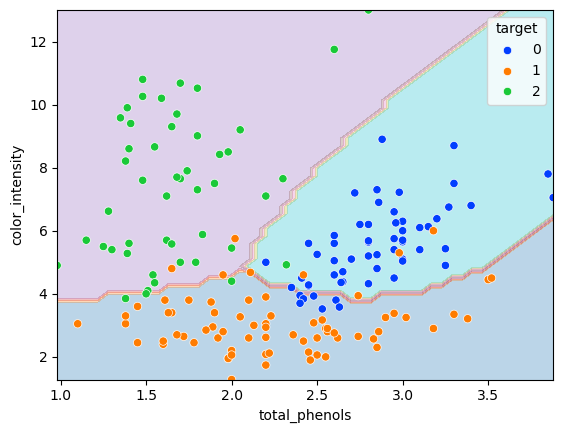

In [12]:
labels = pd.factorize(quintic_pipe.predict(grid))[0]

plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
sns.scatterplot(data = X1, x = 'total_phenols', y = 'color_intensity', hue = y,  palette = 'bright')

### Codio Activity 16.2: Decision Boundaries for Different Classification Models

This activity continues to examine how different classifiers decision boundaries shift as parameters change.  Both the `DecisionTreeClassifier` and its `max_depth` hyperparameter and the `KNeighborsClassifier` and its `n_neighbors` parameter will be explored.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")
warnings.filterwarnings('ignore')

### The Data

Below, the scikitlearn wine dataset from the videos is loaded and displayed.  You will follow the example using `['total_phenols', 'color_intensity']` as predictors.  The `make_plot` function will plot the decision boundary of a given estimator.

In [2]:
X, y = load_wine(return_X_y=True, as_frame=True)

In [3]:
X1 = X[['total_phenols', 'color_intensity']]

In [4]:
def make_plot(estimator):
    xx = np.linspace(X1.iloc[:, 0].min(), X1.iloc[:, 0].max(), 50)
    yy = np.linspace(X1.iloc[:, 1].min(), X1.iloc[:, 1].max(), 50)
    XX, YY = np.meshgrid(xx, yy)
    grid = np.c_[XX.ravel(), YY.ravel()]
    labels = pd.factorize(estimator.predict(grid))[0]
    plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'twilight', alpha = 0.6)
    sns.scatterplot(data = X1, x = 'total_phenols', y = 'color_intensity', hue = y,  palette = 'flare')

### Problem 1

#### KNN with `n_neighbors = 1`

To begin, instantiate a pipeline to scale the data and fit a KNeighborsClassifier with `n_neighbors = 1`. Assign this to knn_pipe_1 below. Ensure that you name the `StandardScaler` and `KNeighborsClassifier` components in the pipeline to `scale` and `model` respectively.

In [5]:
knn_pipe_1 = Pipeline([('scale',StandardScaler()),
                       ('model', KNeighborsClassifier(n_neighbors = 1))])
knn_pipe_1

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=1))])

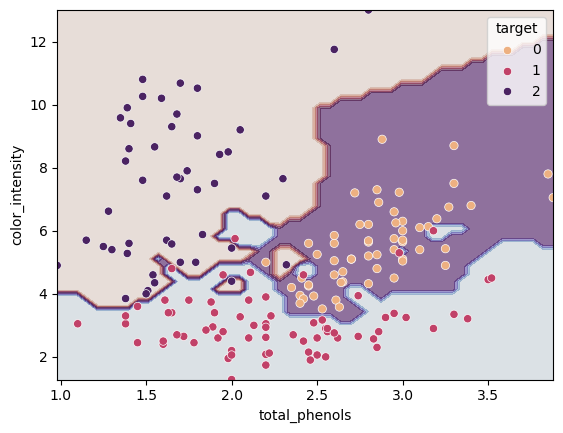

In [6]:
make_plot(knn_pipe_1.fit(X1,y))

### Problem 2

#### KNN with `n_neighbors = 5`

Next, build a pipeline named `knn_pipe_5` below with named steps `scale` and `model` that uses `StandardScaler` and `KNeighborsClassifier` with `n_neighbors = 5`.  Fit this to the data and visualize the decision boundary.

In [7]:
knn_pipe_5 = Pipeline([('scale',StandardScaler()),
                       ('model',KNeighborsClassifier(n_neighbors = 5))]).fit(X1,y)
knn_pipe_5

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsClassifier())])

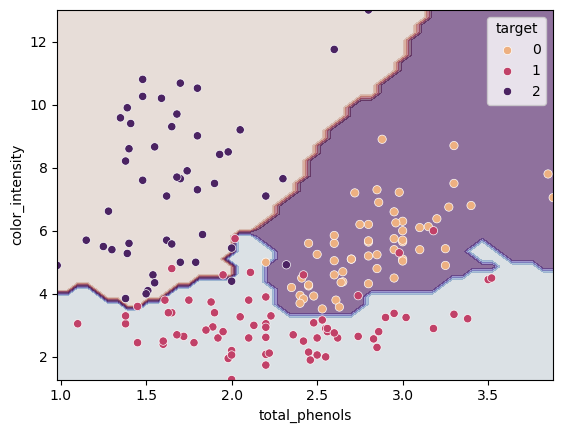

In [8]:
make_plot(knn_pipe_5)

### Problem 3

#### `DecisionTreeClassifier` with `max_depth = 2`

Now, fit a `DecisionTreeClassifier` with `max_depth = 2` and assign to `tree_depth_2` below.  Visualize the results and note the complexity of the decision boundary.

In [9]:
tree_depth_2 = DecisionTreeClassifier(max_depth = 2).fit(X1,y)
tree_depth_2

DecisionTreeClassifier(max_depth=2)

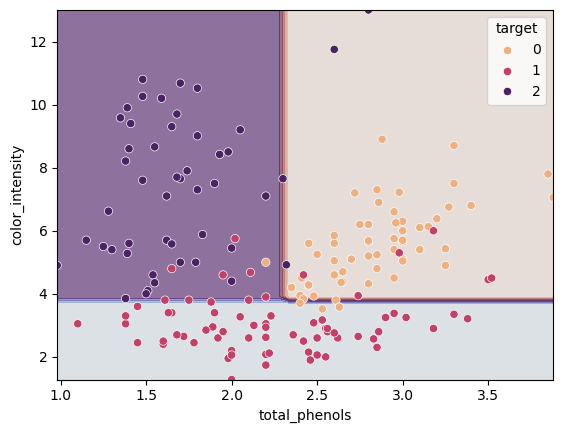

In [10]:
make_plot(tree_depth_2)

### Problem 4

#### DecisionTreeClassifier with `max_depth = None`

Finally, fit a `DecisionTreeClassifier` with `max_depth = None` and assign to `tree_depth_none` below.  Visualize the results and note the complexity of the decision boundary.

In [11]:
tree_depth_none = DecisionTreeClassifier(max_depth = None).fit(X1,y)
tree_depth_none

DecisionTreeClassifier()

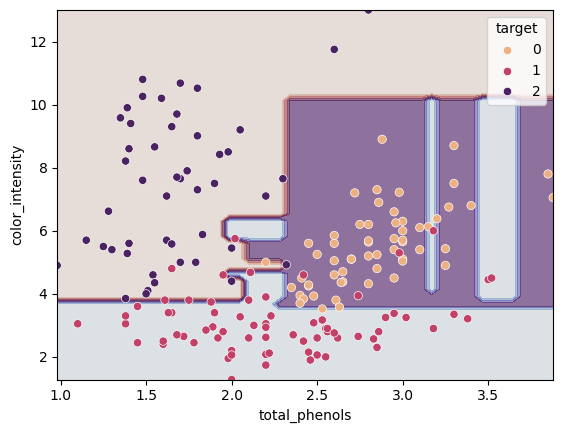

In [12]:
make_plot(tree_depth_none)

### Problem 5

#### Complexity and Parameters in KNN and Decision Tree

Based on the above results, which of the statements below would execute to increase the complexity of the decision boundaries?

```
a. Increase in `max_depth` and `n_neighbors`
b. Decrease in `max_depth` and `n_neighbors`
c. Increase in `max_depth` and  Decrease in `n_neighbors`
d. Decrease in `max_depth` and Increase in `n_neighbors`
```

Enter your answer choice as a string to `ans_5` below.

In [13]:
ans_5 = 'c'